In [1]:
#Source From Learn and all credits go 
# https://nbviewer.jupyter.org/github/raqueeb/TensorFlow2/blob/master/classification_book.ipynb
# https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/classification_book.ipynb#scrollTo=Wz7l27Lz9S1P  
import sys
import pickle
import gzip

try:
  # শুধুমাত্র কোলাব এবং জুপিটার নোটবুকে চেষ্টা করবো টেন্সর-ফ্লো ২.০ এর জন্য
  %tensorflow_version 2.x
except Exception:
  pass

# টেন্সর-ফ্লো এবং কেরাসকে ইমপোর্ট করছি
import tensorflow as tf
from tensorflow import keras

# কিছু হেলপার লাইব্রেরি
import numpy as np
import matplotlib.pyplot as plt

# স্ট্যাটাস দেখি সিস্টেমের 
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

#েটাসেটে অ্যাক্সেস করছি
f = gzip.open('mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    fashion_mnist = pickle.load(f)
else:
    fashion_mnist = pickle.load(f, encoding='bytes')
f.close()
# কেরাসের দিয়ে স্যাম্পল ডেটাসেটে অ্যাক্সেস করছি, সাইকিট লার্নের মতো করে, ট্রেইন / টেস্ট স্প্লিট করে

(X_train, y_train), (X_test, y_test) = fashion_mnist

# কেরাসের দিয়ে স্যাম্পল ডেটাসেটে অ্যাক্সেস করছি, সাইকিট লার্নের মতো করে, ট্রেইন / টেস্ট স্প্লিট করে

# fashion_mnist = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()




Version:  2.0.0
Eager mode:  True


In [2]:
print(X_train.shape)

(60000, 28, 28)


In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
print(y_train.shape)

(60000,)


In [5]:
# অবজেক্টটা কি? 
# এটা ডাউনলোড হয়েছে টেন্সর-ফ্লো মডিউল TFModuleWrapper হিসেবে।

type(fashion_mnist)

tuple

In [6]:
y_train[0]

5

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
#Maximum Training Data
np.max(X_train)

255

## ডেটার প্রি-প্রসেসিং 
যখন ডেটা বেশি ডিস্ট্রিবিউটেড থাকে তখন সেটা কাজ করানো সমস্যা হয়। আমরা যদি প্রথম ছবিটা দেখি,
তাহলে বুঝবো সেটার পিক্সেল রেঞ্জ ০ থেকে ২৫৫ পর্যন্ত। 

#ছবিটা দেখি কালারবার সহ। 

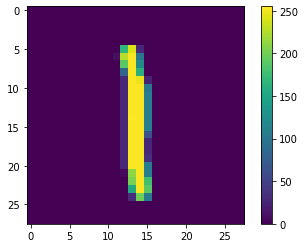

In [9]:
plt.figure()
plt.imshow(X_train[14])
plt.colorbar()
plt.grid(False)
plt.show()

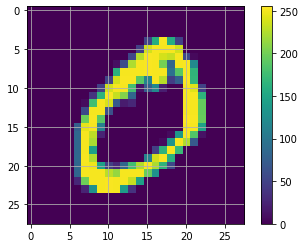

In [10]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(True)

আমাদের ডাটাগুলোকে এমনভাবে প্রি-প্রসেস করতে হবে যাতে সেটা ঠিকমতো কাজ করতে পারে। যেহেতু আমাদের ইনপুট ভ্যারিয়েবলব্গুলো গ্রেস্কেল মানে ০ থেকে ২৫৫ পর্যন্ত রেঞ্জ, সে কারণে আমরা সেটাকে ০ থেকে ১ এর মধ্যে নিয়ে আসব। আমাদের ট্রেনিং এবং টেস্ট সেট দুটোকেই এই নরমালাইজেশন এর মধ্যে নিয়ে আসতে হবে। এটা করার জন্য আমাদেরকে প্রতিটা ইমেজকে ২৫৫ দিয়ে ভাগ করতে হবে। তাহলে সেটা ০ থেকে ১ এর মধ্যে চলে আসবে।

পাইথনে সুবিধা হচ্ছে একটা লিস্টকে নর্মালাইজ করতে লুপিং করতে হবে না। 

In [11]:
# X_train = X_train / 255.0

# y_train = y_train / 255.0

# আমরা এভাবেও করতে পারি, একটা ফাংশন ডিক্লেয়ার করে, তবে সেটা এখন নয়

# def normalize(images, labels):
#  images = tf.cast(images, tf.float32)
#  images /= 255
#  return images, labels

In [12]:
np.max(X_train)


255

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

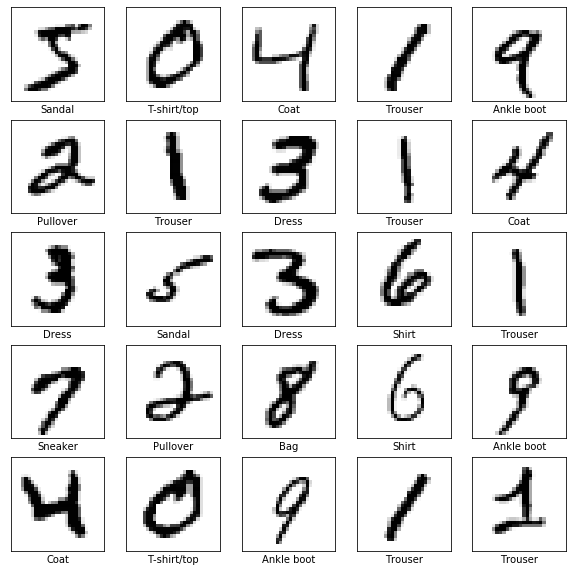

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
#     plt.xlabel(y_train[i])
plt.show()

### লেয়ারগুলোকে সেট করি

একটা নিউরাল নেটওয়ার্কের বেসিক বিল্ডিং ব্লক হচ্ছে তার লেয়ার। এই লেয়ারগুলো বিভিন্ন ফিচার এক্সট্রাক্ট করে রিপ্রেজেন্টেশন এর মাধ্যমে। ইনপুট ডাটা থেকে। যেহেতু একেকটার লেয়ার আরেকটা লেয়ারের সাথে সিকুয়েন্সিয়াল, সে কারণেই ডেন্স `tf.keras.layers.Dense` ব্যবহার করছি। এর ভেতরের ইন্টারনাল প্যারামিটারগুলো নিজে থেকেই এডজাস্ট হয় মানে শেখে এই ট্রেনিং এর সময়। 

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1821 - accuracy: 0.9559
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1819 - accuracy: 0.9556
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1664 - accuracy: 0.9592
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1655 - accuracy: 0.9594
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1630 - accuracy: 0.9606
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1677 - accuracy: 0.9600
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1537 - accuracy: 0.9623
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1537 - accuracy: 0.9635
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1562 - accuracy: 0.9632
Epoch 10/10
60

In [21]:
# model.evaluate(test_images, test_labels)

test_loss, test_acc = model.evaluate(X_train, y_train)

print('\nTest accuracy:', test_acc)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 0.9650667


In [22]:
from sklearn.metrics import accuracy_score
pred_lebel = model.predict_classes(X_train)
accuracy_score(y_train, pred_lebel)

0.9650666666666666

In [24]:
predictions = model.predict(X_test)

In [26]:
predictions[0]

array([1.2455227e-09, 3.3717573e-08, 5.3060823e-04, 9.7893307e-04,
       9.1752872e-06, 2.7927179e-05, 3.3412379e-16, 9.7907078e-01,
       7.3610100e-09, 1.9382523e-02], dtype=float32)